<a href="https://colab.research.google.com/github/Abhiram-k1/Elevate-Labs-AI-ML-Internship/blob/main/Elevate_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

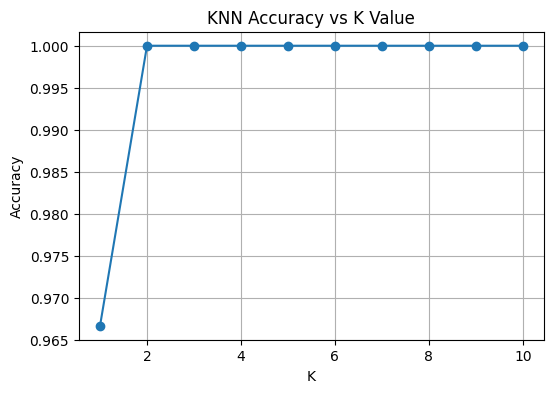

Best K: 2 with Accuracy: 1.00


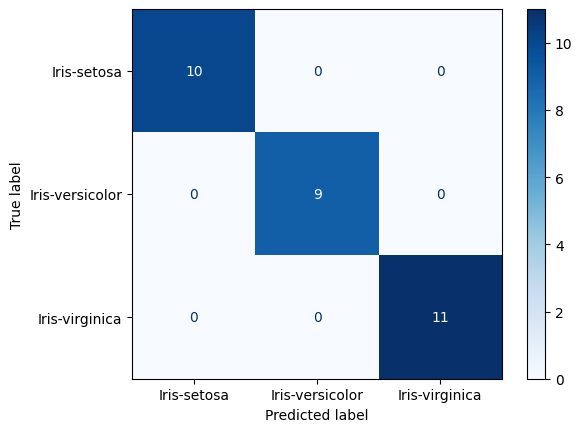

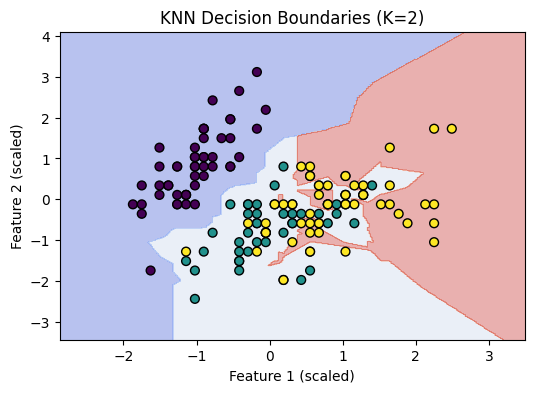

In [2]:
# KNN Classification on Iris Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Load and prepare data
df = pd.read_csv("/content/Iris.csv")
df.drop(columns=['Id'], inplace=True)  # Remove ID column

X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2 & 3: Try different K values
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Step 4: Evaluate for best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with Accuracy: {max(accuracies):.2f}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Step 5: Decision boundary visualization (using only 2 features for plotting)
X_plot = X_scaled[:, :2]  # First two features
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_plot, y, test_size=0.2, random_state=42)

model_2d = KNeighborsClassifier(n_neighbors=best_k)
model_2d.fit(X_train_p, y_train_p)

# Meshgrid for decision boundary
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes.reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=pd.Categorical(y).codes, edgecolor='k', s=40)
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
